In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pyspark.sql import SparkSession
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
spark = SparkSession.builder.appName("UNSW Analysis").getOrCreate()
Geniuskem_df = pd.read_csv('UNSW-NB15.csv')
Geniuskem_df.head(10)

<ipython-input-1-165a25b80bcb>:16: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  Geniuskem_df = pd.read_csv('UNSW-NB15.csv')


,srcip,sport,dstip,dsport,proto,state,dur,sbytes,dbytes,sttl,...,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,attack_cat,Label
0,59.166.0.3,56716,149.171.126.8,143,tcp,FIN,0.825460,7812,16236,31,...,0,2,7,1,4,1,1,1,NaN,0
1,59.166.0.0,43467,149.171.126.6,49729,tcp,FIN,0.101815,4238,65628,31,...,0,7,4,1,6,1,1,1,NaN,0
2,59.166.0.5,41289,149.171.126.2,9574,tcp,FIN,0.044003,2750,29104,31,...,0,3,5,3,3,1,1,1,NaN,0
3,59.166.0.9,43785,149.171.126.0,6881,tcp,FIN,2.790830,10476,395734,31,...,0,11,4,3,2,1,1,1,NaN,0
4,59.166.0.8,40691,149.171.126.9,6881,tcp,FIN,2.633500,13350,548216,31,...,0,16,7,7,1,1,1,1,NaN,0
5,59.166.0.3,20393,149.171.126.3,5190,tcp,FIN,0.115048,1958,2308,31,...,0,2,6,1,4,1,1,1,NaN,0
6,59.166.0.7,19792,149.171.126.0,53,udp,CON,0.003362,146,178,31,...,0,3,2,3,3,3,1,1,NaN,0
7,59.166.0.3,14382,149.171.126.9,3354,tcp,FIN,0.453052,424,8824,31,...,0,4,6,7,4,1,1,2,NaN,0
8,59.166.0.9,37074,149.171.126.2,53,udp,CON,0.001088,146,178,31,...,0,2,5,3,2,1,1,1,NaN,0
9,59.166.0.7,12569,149.171.126.5,53,udp,CON,0.000969,146,178,31,...,0,3,1,2,3,3,1,1,NaN,0


In [2]:
print("\t\t\t\t\t\t\t\t\t__________________________")
print("\t\t\t\t\t\t\t\t\t| Descriptive Statistics |")
print("\t\t\t\t\t\t\t\t\t|________________________|")
print("\n")
Geniuskem_df.describe()

									__________________________
									| Descriptive Statistics |
									|________________________|




,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
count,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,...,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06,2.539739e+06
mean,3.053693e+04,1.123510e+04,6.588634e-01,4.340072e+03,3.643201e+04,6.278150e+01,3.077044e+01,5.164547e+00,1.633142e+01,3.694928e+07,...,1.735336e-02,2.056038e-02,9.207912e+00,8.989883e+00,6.439727e+00,6.901640e+00,4.642572e+00,3.593032e+00,6.846557e+00,1.265024e-01
std,2.044122e+04,1.843820e+04,1.392577e+01,5.640940e+04,1.611053e+05,7.462670e+01,4.285192e+01,2.251837e+01,5.659789e+01,1.186041e+08,...,1.334651e-01,1.843730e-01,1.083708e+01,1.082281e+01,8.162330e+00,8.205340e+00,8.478001e+00,6.174758e+00,1.125880e+01,3.324147e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.123100e+04,5.300000e+01,1.037000e-03,2.000000e+02,1.780000e+02,3.100000e+01,2.900000e+01,0.000000e+00,0.000000e+00,1.353769e+05,...,0.000000e+00,0.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
50%,3.169000e+04,8.000000e+01,1.586400e-02,1.470000e+03,1.820000e+03,3.100000e+01,2.900000e+01,3.000000e+00,4.000000e+00,5.893038e+05,...,0.000000e+00,0.000000e+00,5.000000e+00,5.000000e+00,3.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00
75%,4.743900e+04,1.497000e+04,2.147540e-01,3.182000e+03,1.490800e+04,3.100000e+01,2.900000e+01,7.000000e+00,1.400000e+01,2.038365e+06,...,0.000000e+00,0.000000e+00,1.000000e+01,1.000000e+01,6.000000e+00,7.000000e+00,2.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00
max,6.553500e+04,6.553500e+04,8.786638e+03,1.435577e+07,1.465753e+07,2.550000e+02,2.540000e+02,5.319000e+03,5.507000e+03,5.988000e+09,...,4.000000e+00,8.000000e+00,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.700000e+01,6.000000e+01,6.700000e+01,1.000000e+00


In [3]:
numeric_cols = Geniuskem_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_cols.corr()
print("\t\t\t\t\t\t\t\t\t_______________")
print("\t\t\t\t\t\t\t\t\t| Correlation |")
print("\t\t\t\t\t\t\t\t\t|_____________|")
print("\n")
corr_matrix

									_______________
									| Correlation |
									|_____________|




,sport,dsport,dur,sbytes,dbytes,sttl,dttl,sloss,dloss,Sload,...,is_ftp_login,ct_ftp_cmd,ct_srv_src,ct_srv_dst,ct_dst_ltm,ct_src_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,Label
sport,1.000000,0.086635,-0.015600,0.005539,0.025087,-0.149441,0.105430,0.023604,0.031848,-0.109693,...,0.013641,0.008903,-0.141065,-0.143850,-0.140647,-0.140586,-0.156569,-0.180847,-0.158818,-0.149911
dsport,0.086635,1.000000,-0.019927,-0.010373,-0.012016,-0.240817,-0.004139,0.014627,0.003140,-0.178861,...,-0.079079,-0.067823,-0.149972,-0.167786,-0.200486,-0.188933,-0.248288,-0.246967,-0.242324,-0.216544
dur,-0.015600,-0.019927,1.000000,0.033269,0.086970,-0.003653,0.010704,0.041492,0.087712,-0.014713,...,0.007083,0.006410,-0.019281,-0.018433,-0.013801,-0.015875,-0.013106,-0.011310,-0.016090,0.001957
sbytes,0.005539,-0.010373,0.033269,1.000000,0.047026,-0.008925,0.066420,0.953493,0.051181,-0.020987,...,-0.003361,-0.002880,-0.035121,-0.035159,-0.027999,-0.027655,-0.027932,-0.028037,-0.031109,0.010177
dbytes,0.025087,-0.012016,0.086970,0.047026,1.000000,-0.094180,0.009104,0.115530,0.991342,-0.069977,...,-0.026484,-0.022707,-0.051522,-0.052017,-0.060301,-0.065276,-0.066217,-0.072033,-0.079891,-0.075554
sttl,-0.149441,-0.240817,-0.003653,-0.008925,-0.094180,1.000000,0.113994,-0.069435,-0.118656,0.280094,...,-0.049769,-0.043434,0.455556,0.458113,0.394238,0.395496,0.456682,0.478104,0.513668,0.904411
dttl,0.105430,-0.004139,0.010704,0.066420,0.009104,0.113994,1.000000,0.076670,0.013899,-0.219164,...,0.028129,0.019644,-0.301476,-0.308997,-0.287366,-0.278799,-0.274883,-0.287785,-0.290198,0.134921
sloss,0.023604,0.014627,0.041492,0.953493,0.115530,-0.069435,0.076670,1.000000,0.153321,-0.068916,...,0.032256,0.027712,-0.081519,-0.083028,-0.079297,-0.079086,-0.085494,-0.087468,-0.094260,-0.043283
dloss,0.031848,0.003140,0.087712,0.051181,0.991342,-0.118656,0.013899,0.153321,1.000000,-0.088832,...,-0.003979,-0.003368,-0.073031,-0.074394,-0.081916,-0.086347,-0.090534,-0.096450,-0.106169,-0.095869
Sload,-0.109693,-0.178861,-0.014713,-0.020987,-0.069977,0.280094,-0.219164,-0.068916,-0.088832,1.000000,...,-0.040268,-0.034538,0.473105,0.478693,0.428392,0.418798,0.473294,0.489081,0.513060,0.192315


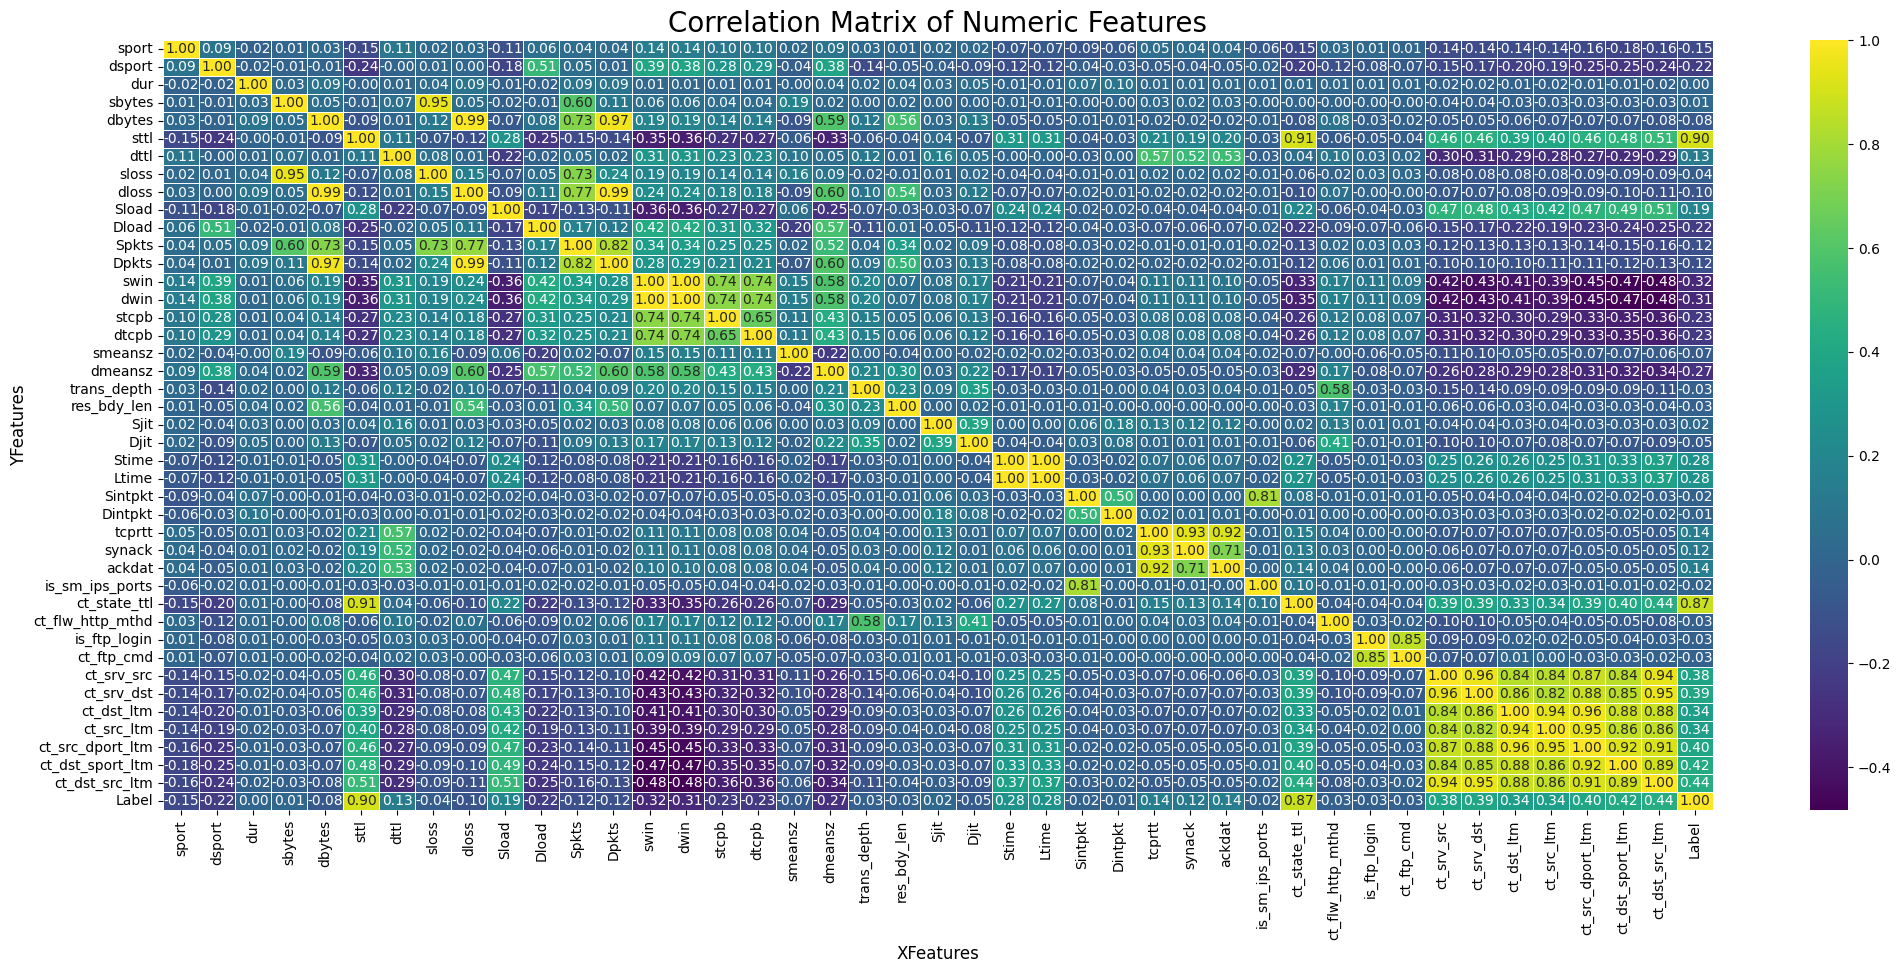

In [4]:
plt.figure(figsize=(25,10))
heatmap = sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)
heatmap.set_title('Correlation Matrix of Numeric Features', fontsize=20)
heatmap.set_xlabel('XFeatures', fontsize=12)
heatmap.set_ylabel('YFeatures', fontsize=12)
plt.show()

In [5]:
print("\t\t\t\t\t\t\t\t\t_______________")
print("\t\t\t\t\t\t\t\t\t| F-statistic |")
print("\t\t\t\t\t\t\t\t\t|_____________|")
print("\n")
grouped_data = [Geniuskem_df[Geniuskem_df['attack_cat'] == cat]['dur'] for cat in Geniuskem_df['attack_cat'].unique()]
f_stat, p_value = stats.f_oneway(*grouped_data)
print(f"P-value: {p_value}")
print("\n")
if p_value < 0.05:
    print("Reject null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

									_______________
									| F-statistic |
									|_____________|


P-value: nan


Fail to reject null hypothesis.


/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


In [6]:
print("\t\t\t\t\t\t\t\t\t_______________")
print("\t\t\t\t\t\t\t\t\t| T-statistic |")
print("\t\t\t\t\t\t\t\t\t|_____________|")
print("\n")
normal_traffic = Geniuskem_df[Geniuskem_df['Label'] == 0]['sbytes']
attack_traffic = Geniuskem_df[Geniuskem_df['Label'] == 1]['sbytes']
t_stat, p_value = stats.ttest_ind(normal_traffic, attack_traffic)
print(f"P-value: {p_value}")
print("\n")
if p_value < 0.05:
    print("Reject null hypothesis.")
else:
    print("Fail to reject null hypothesis.")

									_______________
									| T-statistic |
									|_____________|


P-value: 3.677042544789568e-59


Reject null hypothesis.


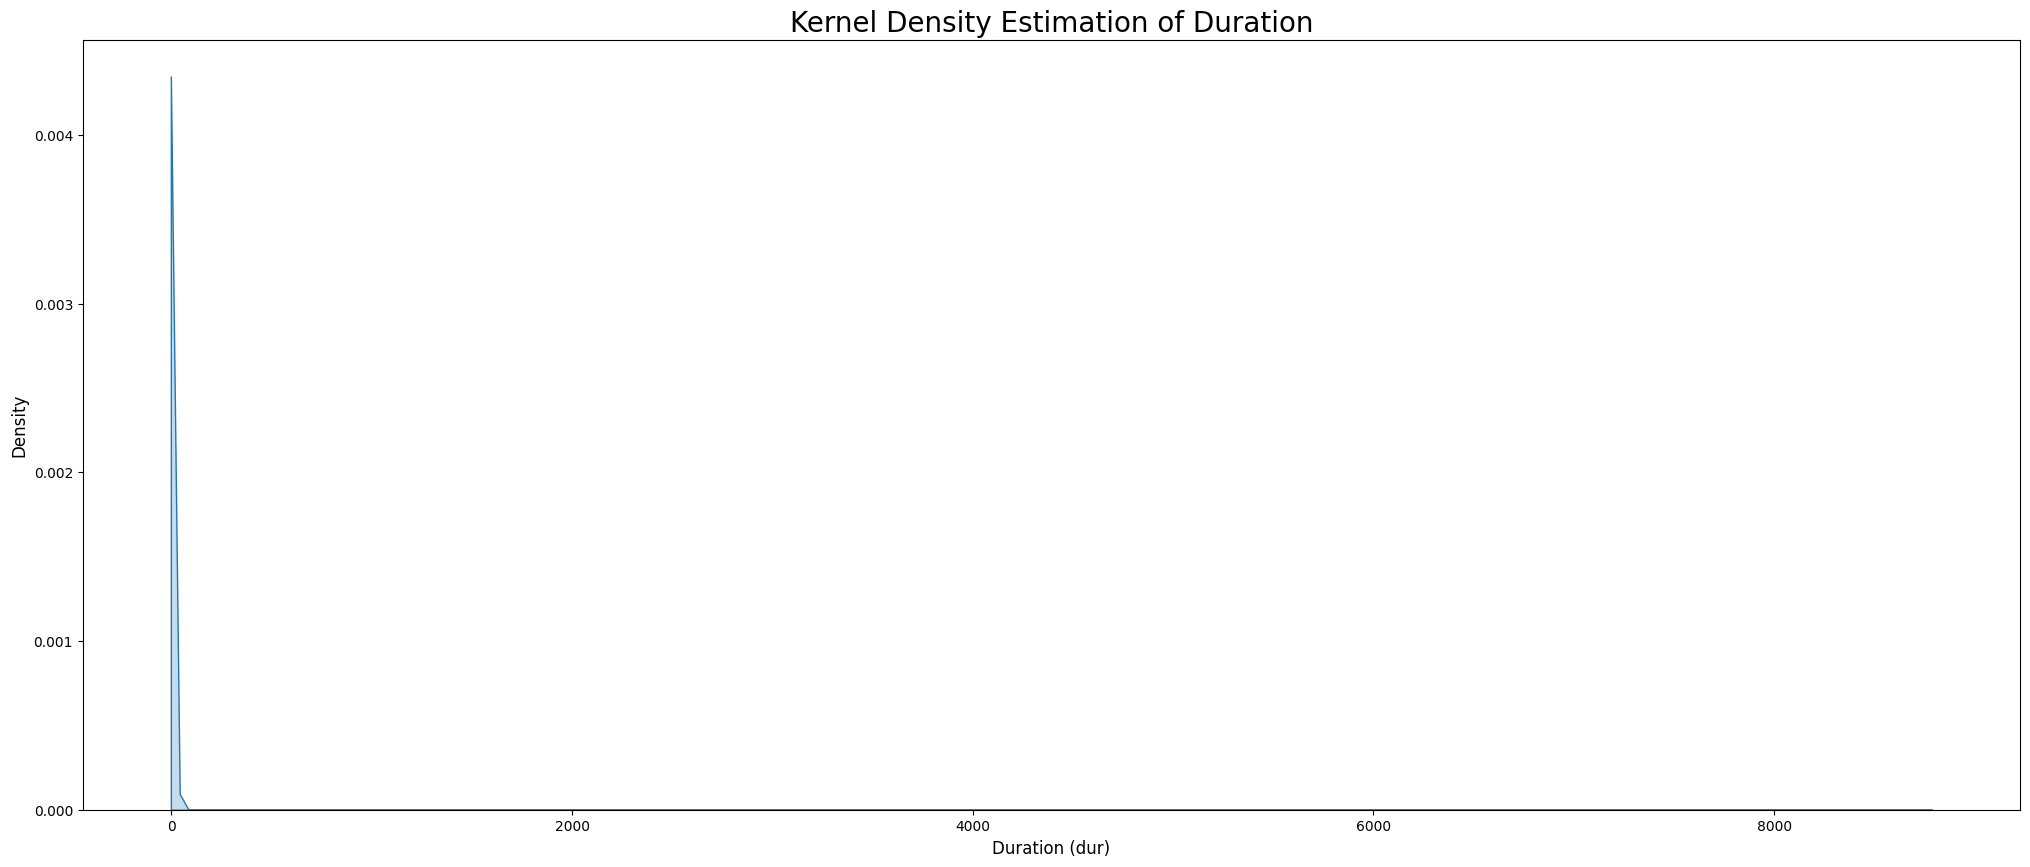

In [7]:
plt.figure(figsize=(25, 10))
sns.kdeplot(Geniuskem_df['dur'], fill=True)
plt.title('Kernel Density Estimation of Duration',fontsize=20)
plt.xlabel('Duration (dur)',fontsize=12)
plt.ylabel('Density',fontsize=12)
plt.show()

									______________________________________
									| Principal component analysis (PCA) |
									|____________________________________|


Variance PC1: 0.2276414795861923


Variance PC2: 0.10371523433320584





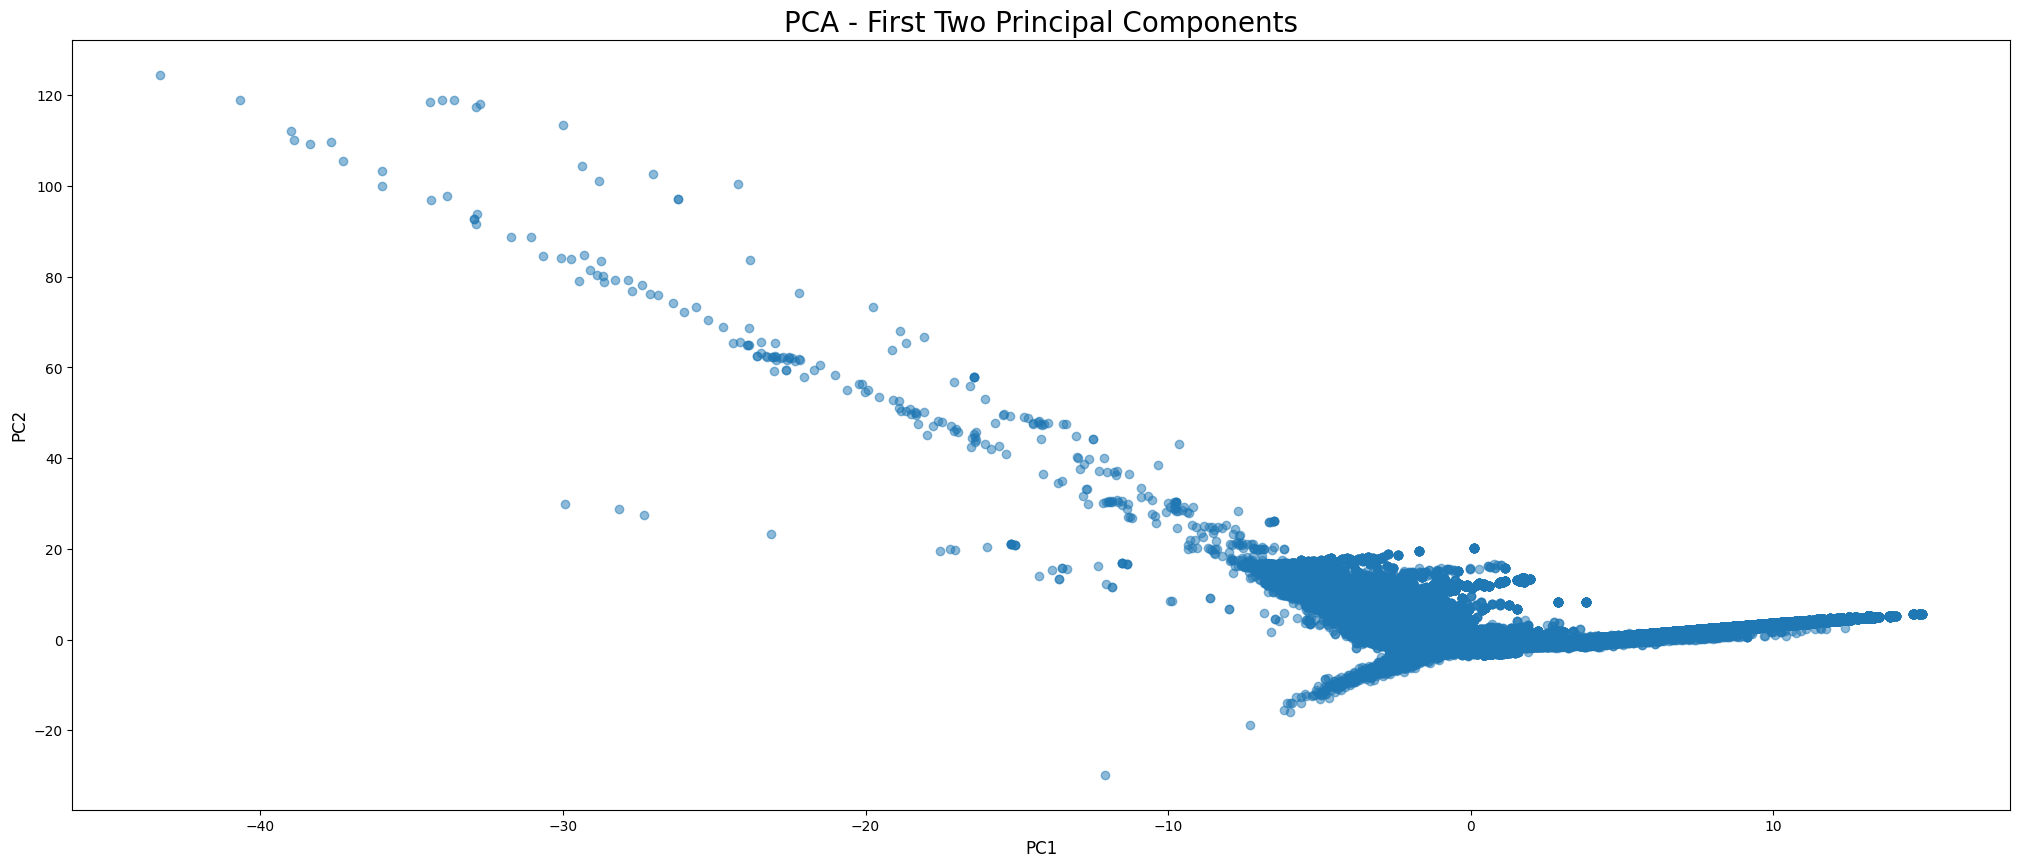

In [8]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_cols)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_data)
pca_df = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])
print("\t\t\t\t\t\t\t\t\t______________________________________")
print("\t\t\t\t\t\t\t\t\t| Principal component analysis (PCA) |")
print("\t\t\t\t\t\t\t\t\t|____________________________________|")
print("\n")
print(f"Variance PC1: {pca.explained_variance_ratio_[0]}")
print("\n")
print(f"Variance PC2: {pca.explained_variance_ratio_[1]}")
print("\n\n")
plt.figure(figsize=(25, 10))
plt.scatter(pca_df['PC1'], pca_df['PC2'], alpha=0.5)
plt.title('PCA - First Two Principal Components',fontsize=20)
plt.xlabel('PC1',fontsize=12)
plt.ylabel('PC2',fontsize=12)
plt.show()

									___________
									| K-MEANS |
									|_________|


Cluster Centers: [[ -2.21538226   0.31695173]
 [  5.95731964   1.00749564]
 [  0.19218813  -1.52773037]
 [ -4.4626522   10.54108468]
 [  8.79752784   2.5389383 ]
 [  3.26893098  -0.47996312]
 [-22.72139466  67.22258696]
 [ -3.23857653   5.28002692]
 [ -5.72559322  13.10938763]
 [ -1.46942611  -0.62162596]]




/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


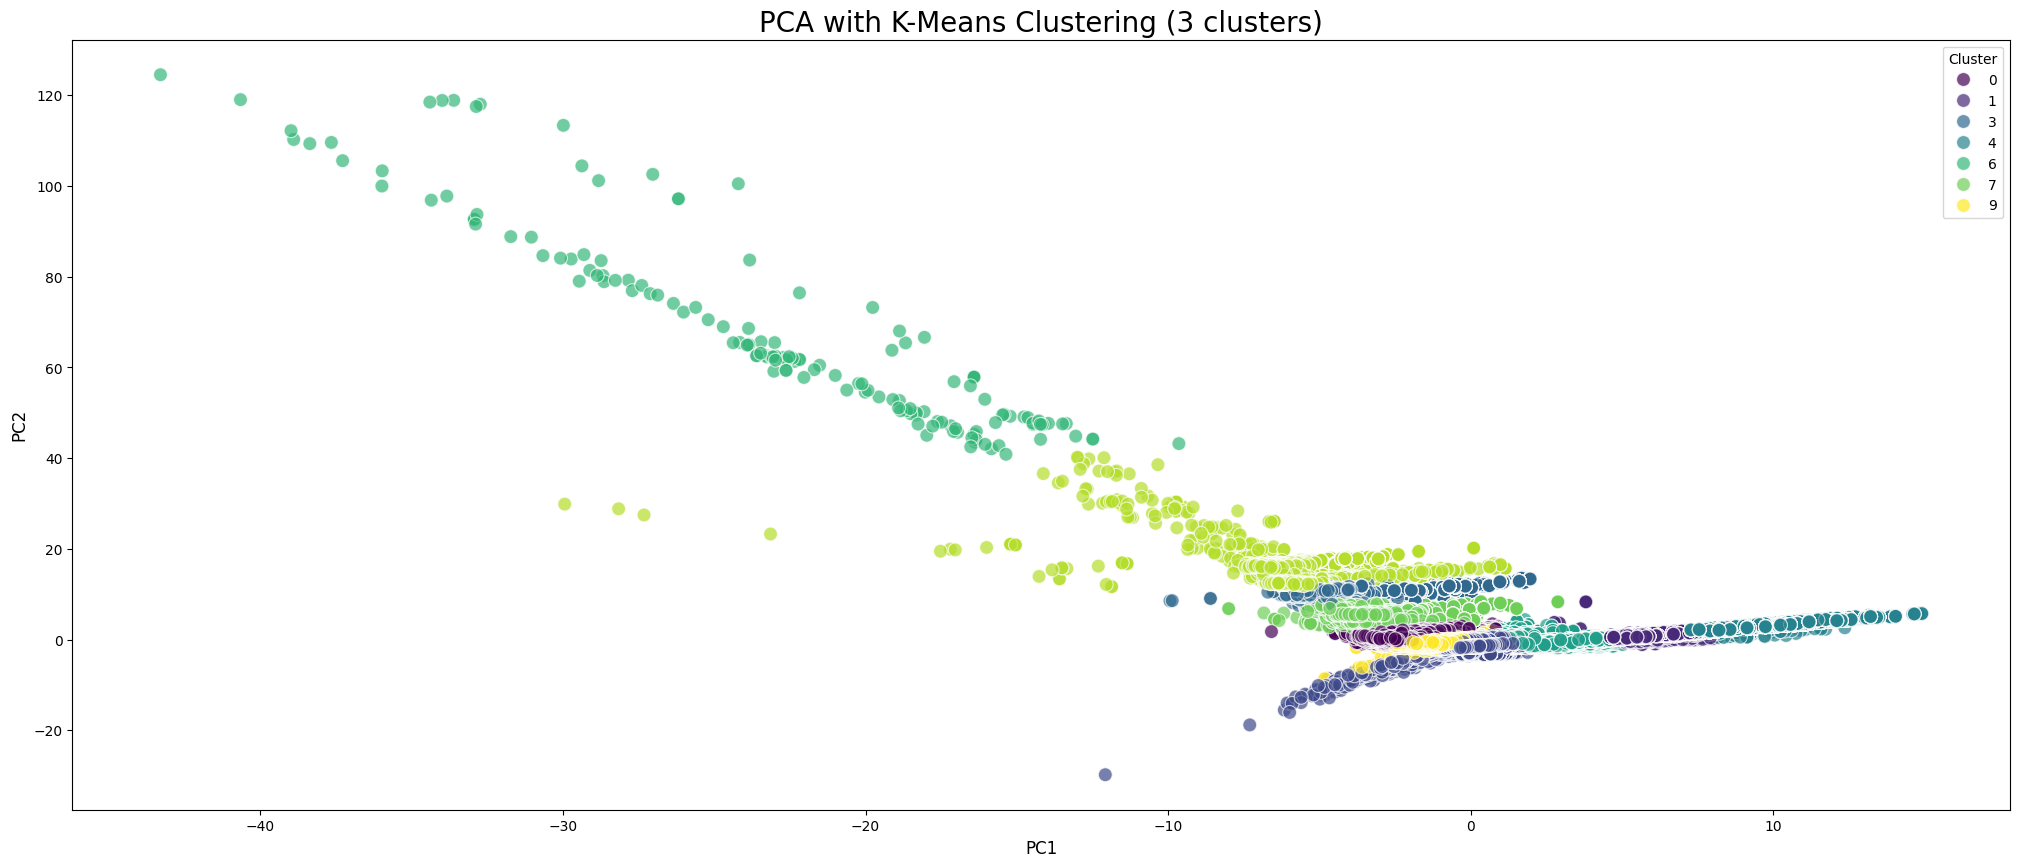

In [9]:
print("\t\t\t\t\t\t\t\t\t___________")
print("\t\t\t\t\t\t\t\t\t| K-MEANS |")
print("\t\t\t\t\t\t\t\t\t|_________|")
print("\n")
kmeans = KMeans(n_clusters=10, random_state=42)
pca_df['Cluster'] = kmeans.fit_predict(pca_components)
print(f"Cluster Centers: {kmeans.cluster_centers_}")
print("\n")
plt.figure(figsize=(25, 10))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, hue='Cluster', palette='viridis', s=100, alpha=0.7)
plt.title('PCA with K-Means Clustering (3 clusters)', fontsize=20)
plt.xlabel('PC1', fontsize=12)
plt.ylabel('PC2', fontsize=12)
plt.show()

In [10]:
X = Geniuskem_df.select_dtypes(include=['float64', 'int64']).drop(columns=['Label'])
y = Geniuskem_df['Label']
#80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
classifier = LogisticRegression(max_iter=10000)
classifier.fit(X_train_scaled, y_train)
y_pred = classifier.predict(X_test_scaled)
print("\t\t\t\t\t\t\t\t\t_________________________")
print("\t\t\t\t\t\t\t\t\t| Classification-Report |")
print("\t\t\t\t\t\t\t\t\t|_______________________|")
print("\n")
print(classification_report(y_test, y_pred))
print("\n")
print("\t\t\t\t\t\t\t\t\t___________________")
print("\t\t\t\t\t\t\t\t\t| Confusion Matrix|")
print("\t\t\t\t\t\t\t\t\t|_________________|")
print("\n")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("\t\t\t\t\t\t\t\t\t__________________")
print("\t\t\t\t\t\t\t\t\t| Accuracy Score |")
print("\t\t\t\t\t\t\t\t\t|________________|")
print("\n")
print(accuracy_score(y_test, y_pred))

									_________________________
									| Classification-Report |
									|_______________________|


              precision    recall  f1-score   support

           0       0.99      0.99      0.99    443922
           1       0.93      0.96      0.95     64026

    accuracy                           0.99    507948
   macro avg       0.96      0.98      0.97    507948
weighted avg       0.99      0.99      0.99    507948



									___________________
									| Confusion Matrix|
									|_________________|


[[439408   4514]
 [  2468  61558]]


									__________________
									| Accuracy Score |
									|________________|


0.9862544984919717


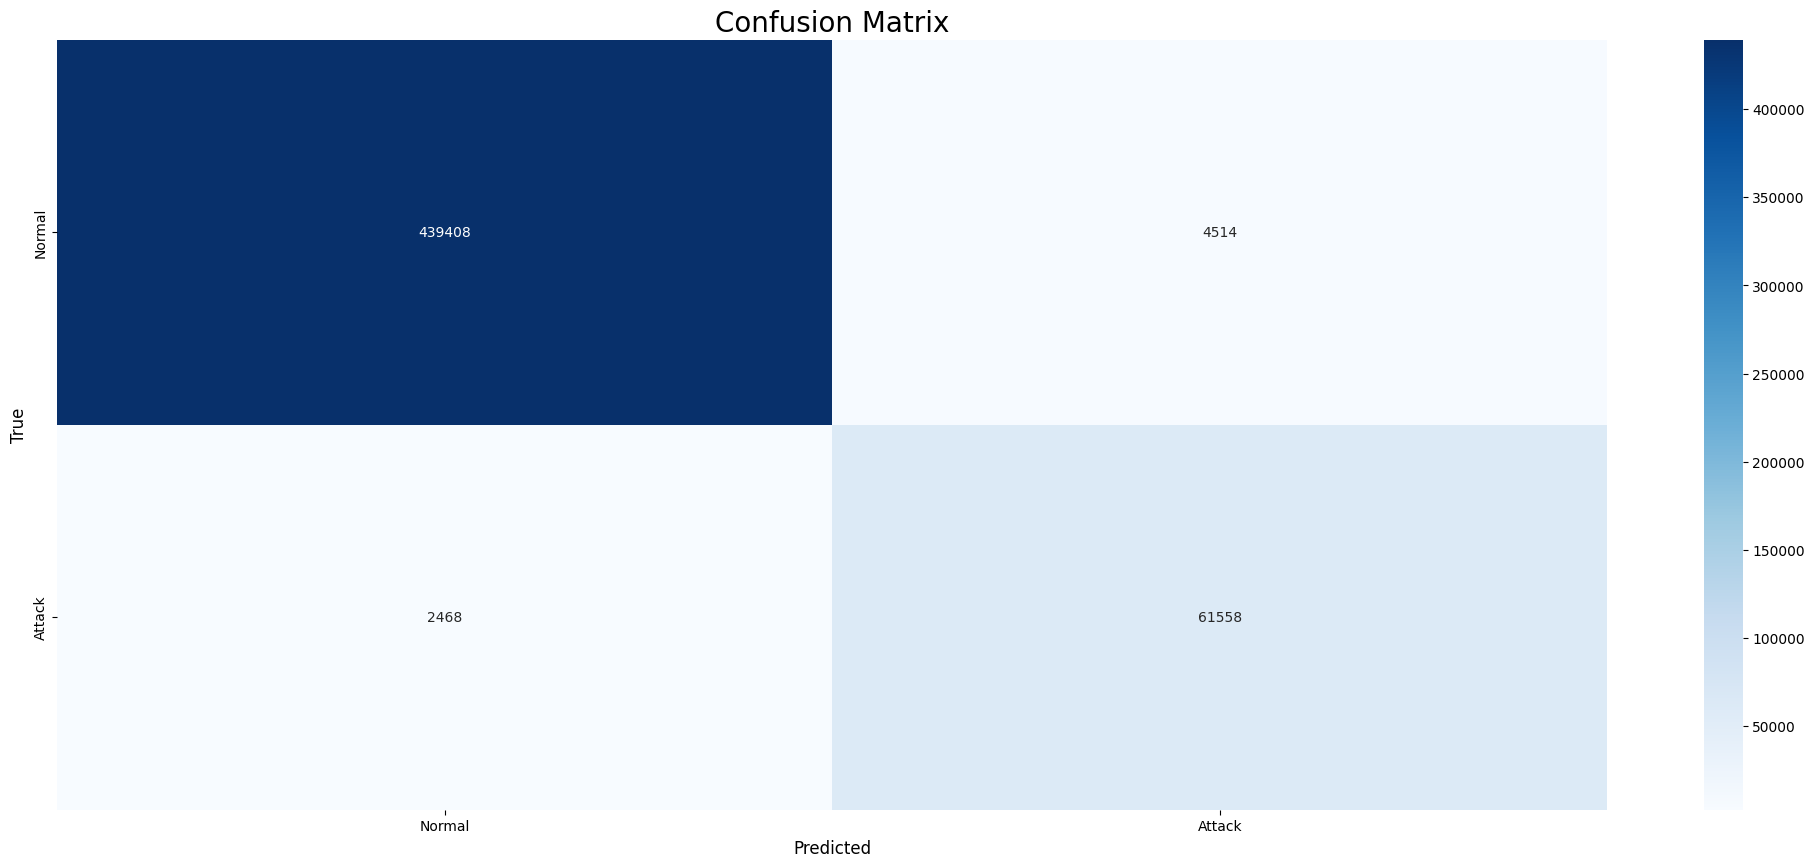

In [11]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
plt.figure(figsize=(25,10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.title('Confusion Matrix',fontsize=20)
plt.xlabel('Predicted',fontsize=12)
plt.ylabel('True',fontsize=12)
plt.show()

In [22]:
X = Geniuskem_df.select_dtypes(include=['float64', 'int64']).drop(columns=['Label'])
y = Geniuskem_df['Label']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print("Encoded target variable (y):", np.unique(y_encoded))

Encoded target variable (y): [0 1]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)
print("Training set size:", X_train.shape)
print("\n")
print("Testing set size:", X_test.shape)

Training set size: (2031791, 42)


Testing set size: (507948, 42)


In [27]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_scaled, y_train)
print("Random Forest Classifier Parameters:", rf_classifier.get_params())

Random Forest Classifier Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


In [33]:
y_pred = rf_classifier.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("\t\t\t\t\t\t\t\t\t__________________")
print("\t\t\t\t\t\t\t\t\t| Accuracy Score |")
print("\t\t\t\t\t\t\t\t\t|________________|")
print("\n")
print(accuracy)
print("\n")
print("\t\t\t\t\t\t\t\t\t____________________")
print("\t\t\t\t\t\t\t\t\t| Confusion Matrix |")
print("\t\t\t\t\t\t\t\t\t|__________________|")
print("\n")
print(confusion_matrix(y_test, y_pred))

									__________________
									| Accuracy Score |
									|________________|


0.9963578949026278


									____________________
									| Confusion Matrix |
									|__________________|


[[443142    780]
 [  1070  62956]]


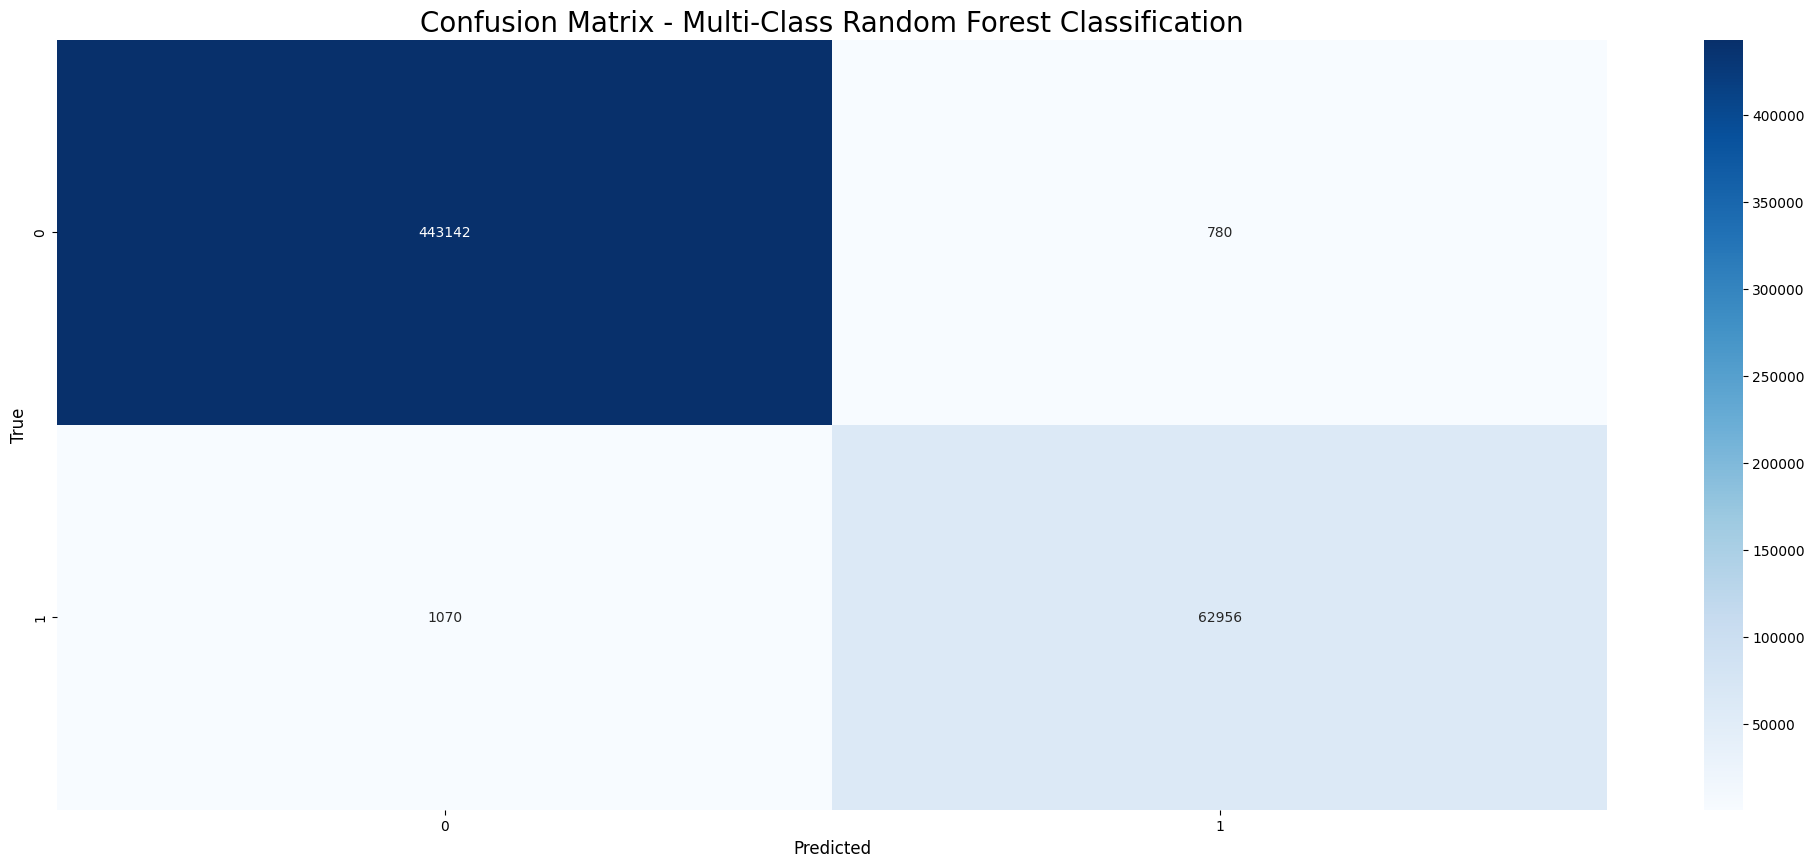

In [35]:
plt.figure(figsize=(25,10))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix - Multi-Class Random Forest Classification', fontsize=20)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()